# IQ Comparison Notebook

2×8-bit IQ

$$
\forall n:\;r[n]\in\mathbb{Z}_{256},\;\tilde{r}[n]=\frac{r[n]-128}{128},\;\hat{r}[n]=\mathcal{H}\{\tilde{r}\}(n).\\
\tilde{s}[n]=\left(\tilde{r}[n]+j\hat{r}[n]\right)e^{-j2\pi (f_c-f_0) n / f_s}.\\
\tilde{s}\xrightarrow{\downarrow M}\;s[m],\;I[m]=\Re\{s[m]\},\;Q[m]=\Im\{s[m]\}.
$$

$$
\mathcal{Q}_{u8}(x)=\operatorname{clip}\left(\left\lfloor (x+1) 127.5 \right\rceil,0,255\right),\\
\mathcal{I}(m)=2m,\;\mathcal{Q}(m)=2m+1,\\
\forall m:\;b_{\mathcal{I}(m)}=\mathcal{Q}_{u8}(I[m]),\;b_{\mathcal{Q}(m)}=\mathcal{Q}_{u8}(Q[m]).
$$

$$
\Phi: \mathbb{B}_{256}^{2N}\rightarrow \mathbb{C}^N,\;\Phi(b)_m=\frac{(b_{2m}-128)+j(b_{2m+1}-128)}{128}.\\
\Phi^{-1}(s)=\operatorname{interleave}(\mathcal{Q}_{u8}(\Re s),\mathcal{Q}_{u8}(\Im s)).\\
\text{Receiver constraint: } f_s=\frac{2048\,\text{kSa/s}}{1}.\;
$$

$$
\mathbf{x}_\text{ref}=\Phi(b^{(H)}),\;\mathbf{x}_\text{conv}=\Phi(b^{(F)}).\\
\sigma_I=\sqrt{\mathbb{E}[I^2]-\mathbb{E}[I]^2},\;\sigma_Q=\sqrt{\mathbb{E}[Q^2]-\mathbb{E}[Q]^2}.\\
\text{Compare }\mu_I,\mu_Q,\sigma_I,\sigma_Q,\text{RMS}(|\mathbf{x}|).
$$

$$
\text{Histogram bins}\rightarrow \rho_I,\rho_Q:\mathbb{R}\rightarrow \mathbb{R}_+.\\
\text{Time slice }\mathbf{x}[0:5000]\rightarrow \text{visual inspection of drift/bias}.\\
\text{Constellation }\{(I[k],Q[k])\}\rightarrow \text{energy symmetry}.\\
\text{PSD }\rightarrow 10\log_{10} S_{II}(f), S_{QQ}(f).\\
\text{CDF }\rightarrow F_{|x|}(\tau)=\mathbb{P}(|x|\le\tau).
$$

$$
\text{Let } r[n] \in \mathbb{Z}_{256},\;\tilde{r}[n] = \frac{r[n]-128}{128}.\\
\mathcal{H}\{r\}(n) = \tilde{r}[n] + j\,\hat{r}[n].\\
\tilde{r}[n] \cdot e^{-j 2 \pi \Delta f n / f_s} \xrightarrow{\mathrm{LPF}\downarrow} s[m].\\
I[m] = \Re\{s[m]\},\; Q[m] = \Im\{s[m]\}.\\
\mathcal{Q}_{u8}(x) = \operatorname{clip}\left(\left\lfloor (x+1) 127.5 \right\rceil, 0, 255 \right).\\
\text{Interleave: } b[2m]=\mathcal{Q}_{u8}(I[m]),\; b[2m+1]=\mathcal{Q}_{u8}(Q[m]).
$$

$$
\mathbb{B}_{\text{repo}} = \{ b_k \mid b_k \in \{0,1,\dots,255\} \}.\\
\phi : \mathbb{B}_{\text{repo}}^{2N} \rightarrow \mathbb{C}^N,\quad \phi(b)_n = \frac{(b_{2n}-128) + j (b_{2n+1}-128)}{128}.\\
\phi^{-1}(s) = \operatorname{interleave}(\mathcal{Q}_{u8}(\Re\{s_n\}),\mathcal{Q}_{u8}(\Im\{s_n\})).
$$

In [9]:

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
FS_HZ = 2_048_000

RAW_HIDRIVE = Path('../data/raw/230914_data_90s.bin')
RAW_FAIRDATA = Path('../data/processed/TGS_L1_E1_2p048Msps_iq_u8.bin')
SAMPLE_COUNT = 2_000_000

set_matplotlib_formats('png')
import scienceplots
plt.style.use(['science','grid'])


In [10]:

PLOT_DIR = Path('../plots/iq_comparison')
PLOT_DIR.mkdir(parents=True, exist_ok=True)


def save_figure(fig, stem: str, dpi: int = 300):
    """Persist vector outputs for LaTeX while keeping inline PNGs."""
    for ext in ('svg', 'pdf'):
        fig.savefig(PLOT_DIR / f'{stem}.{ext}', dpi=dpi, bbox_inches='tight')
    print(f'Exported {stem} to {PLOT_DIR}')


In [11]:
def load_iq(path: Path, count: int):
    if not path.exists():
        raise FileNotFoundError(path)
    data = np.fromfile(path, dtype=np.uint8, count=2 * count)
    if data.size < 2:
        raise RuntimeError(f'Not enough data read from {path}')
    data = (data.astype(np.float32) - 128.0) / 128.0
    i = data[0::2]
    q = data[1::2]
    return i + 1j * q

def describe_iq(data: np.ndarray, label: str):
    print(f'{label} stats (first {data.size} samples):')
    print(f'  Real  min/mean/max/std: {data.real.min(): .4f}, {data.real.mean(): .4f}, {data.real.max(): .4f}, {data.real.std(): .4f}')
    print(f'  Imag  min/mean/max/std: {data.imag.min(): .4f}, {data.imag.mean(): .4f}, {data.imag.max(): .4f}, {data.imag.std(): .4f}')
    print(f'  RMS magnitude: {np.sqrt(np.mean(np.abs(data)**2)):.4f}')


In [12]:
iq_hidrive = load_iq(RAW_HIDRIVE, SAMPLE_COUNT)
describe_iq(iq_hidrive, 'HiDrive sample')

iq_fairdata = load_iq(RAW_FAIRDATA, SAMPLE_COUNT)
describe_iq(iq_fairdata, 'Fairdata converted')

HiDrive sample stats (first 2000000 samples):
  Real  min/mean/max/std: -0.8750, -0.0049,  0.8906,  0.1628
  Imag  min/mean/max/std: -0.8438, -0.0050,  0.7891,  0.1626
  RMS magnitude: 0.2302
Fairdata converted stats (first 2000000 samples):
  Real  min/mean/max/std: -0.8438, -0.0033,  0.8516,  0.2284
  Imag  min/mean/max/std: -0.8359, -0.0038,  0.8438,  0.2284
  RMS magnitude: 0.3230


Exported iq_histograms to ../plots/iq_comparison


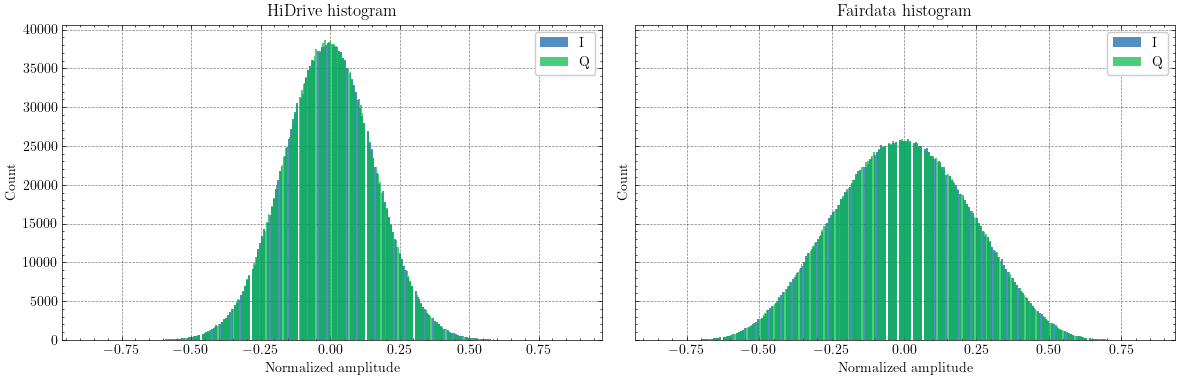

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, data, title in zip(axes, [iq_hidrive, iq_fairdata], ['HiDrive', 'Fairdata']):
    ax.hist(data.real, bins=256, alpha=0.7, label='I')
    ax.hist(data.imag, bins=256, alpha=0.7, label='Q')
    ax.set_title(f'{title} histogram')
    ax.set_xlabel('Normalized amplitude')
    ax.set_ylabel('Count')
    ax.legend()
fig.tight_layout()
save_figure(fig, 'iq_histograms')


Exported time_domain to ../plots/iq_comparison


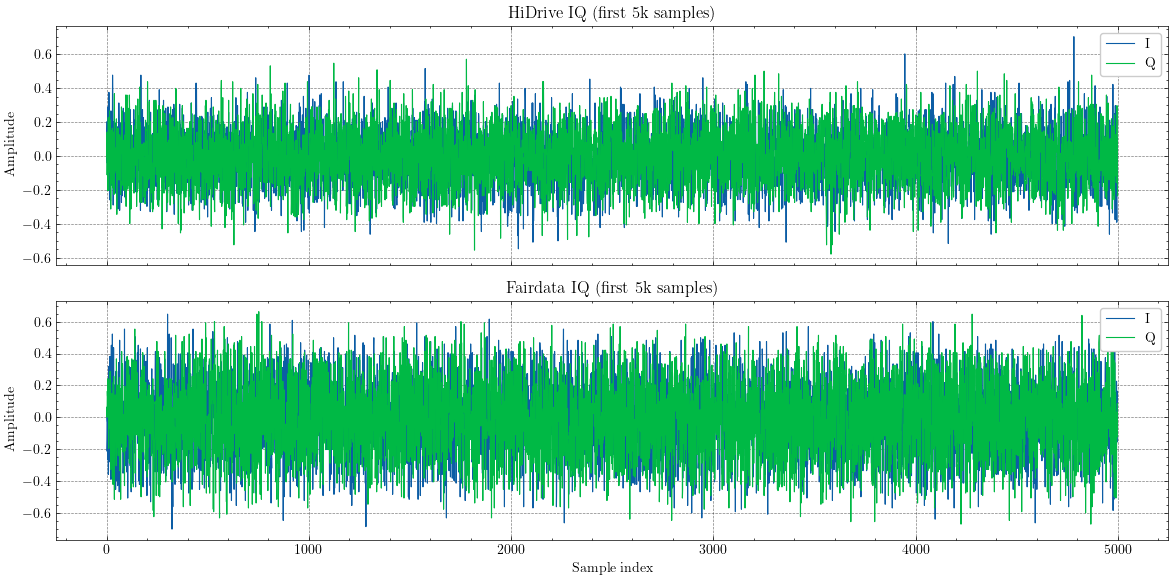

In [14]:
window = slice(0, 5000)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axes[0].plot(iq_hidrive.real[window], label='I', linewidth=0.8)
axes[0].plot(iq_hidrive.imag[window], label='Q', linewidth=0.8)
axes[0].set_title('HiDrive IQ (first 5k samples)')
axes[0].legend(loc='upper right')
axes[0].set_ylabel('Amplitude')
axes[1].plot(iq_fairdata.real[window], label='I', linewidth=0.8)
axes[1].plot(iq_fairdata.imag[window], label='Q', linewidth=0.8)
axes[1].set_title('Fairdata IQ (first 5k samples)')
axes[1].legend(loc='upper right')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('Sample index')
fig.tight_layout()
save_figure(fig, 'time_domain')


Exported constellation to ../plots/iq_comparison


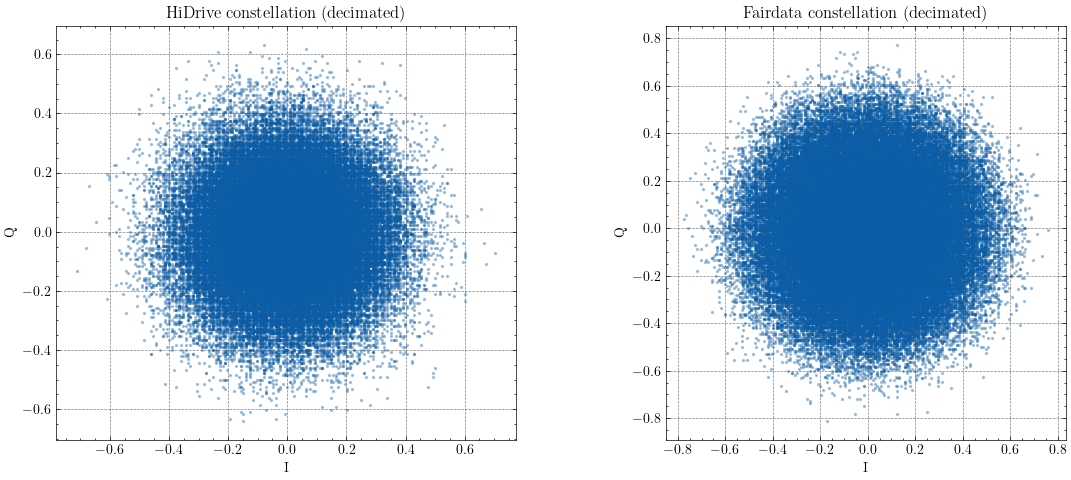

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, data, title in zip(axes, [iq_hidrive, iq_fairdata], ['HiDrive', 'Fairdata']):
    ax.scatter(data.real[::20], data.imag[::20], s=2, alpha=0.3)
    ax.set_title(f"{title} constellation (decimated)")
    ax.set_xlabel('I')
    ax.set_ylabel('Q')
    ax.set_aspect('equal', 'box')
fig.tight_layout()
save_figure(fig, 'constellation')


Exported welch_psd to ../plots/iq_comparison


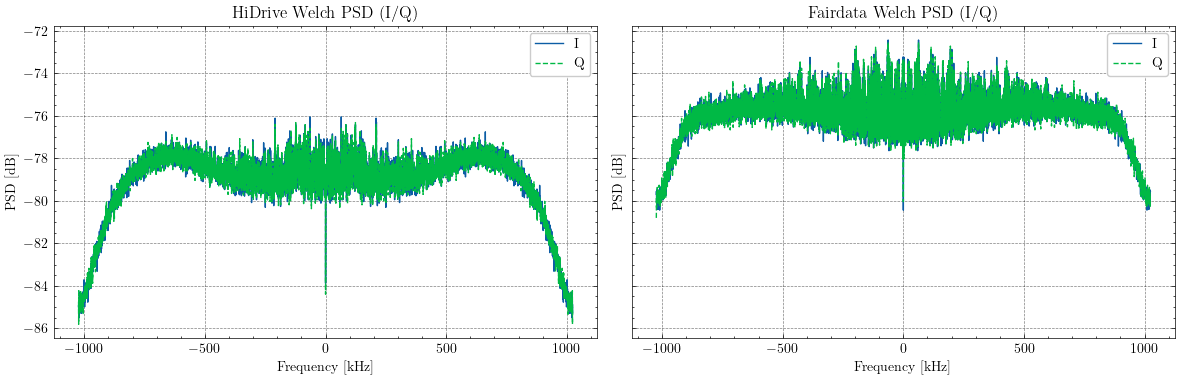

In [16]:
import scipy.signal as sig
win = sig.get_window('hann', 8192)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for ax, data, title in zip(axes, [iq_hidrive, iq_fairdata], ['HiDrive', 'Fairdata']):
    f_i, pxx_i = sig.welch(data.real, fs=FS_HZ, window=win, nperseg=8192, return_onesided=False, detrend='constant')
    f_q, pxx_q = sig.welch(data.imag, fs=FS_HZ, window=win, nperseg=8192, return_onesided=False, detrend='constant')
    ax.plot(np.fft.fftshift(f_i)/1e3, 10*np.log10(np.fft.fftshift(pxx_i)+1e-12), label='I')
    ax.plot(np.fft.fftshift(f_q)/1e3, 10*np.log10(np.fft.fftshift(pxx_q)+1e-12), label='Q', linestyle='--')
    ax.set_title(f"{title} Welch PSD (I/Q)")
    ax.set_xlabel('Frequency [kHz]')
    ax.set_ylabel('PSD [dB]')
    ax.legend()
fig.tight_layout()
save_figure(fig, 'welch_psd')


Exported amplitude_cdf to ../plots/iq_comparison


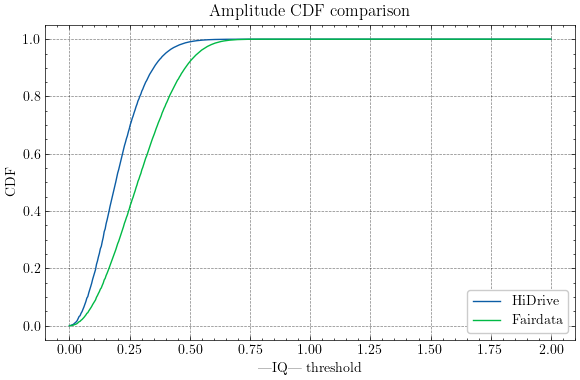

In [17]:
mag_hidrive = np.abs(iq_hidrive)
mag_fair = np.abs(iq_fairdata)
thresholds = np.linspace(0, 2, 500)
cdf_h = [np.mean(mag_hidrive <= t) for t in thresholds]
cdf_f = [np.mean(mag_fair <= t) for t in thresholds]
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(thresholds, cdf_h, label='HiDrive')
ax.plot(thresholds, cdf_f, label='Fairdata')
ax.set_xlabel('|IQ| threshold')
ax.set_ylabel('CDF')
ax.set_title('Amplitude CDF comparison')
ax.legend()
fig.tight_layout()
save_figure(fig, 'amplitude_cdf')
